In [1]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [2]:
# Voraussetzung: Mindestens tensorflow-Version 2
# mit integriertem Keras 

import tensorflow
print('Keras      :', tensorflow.keras.__version__)
print('Tensorflow :', tensorflow.__version__)

Keras      : 2.2.4-tf
Tensorflow : 2.0.0


In [3]:
# Biliothek: Drucken von Grafiken, Bildern, etc. .....
from matplotlib            import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Biliothek: Drucken von Grafiken, Bildern, etc. .....
from matplotlib            import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

# Bibliothek: Rechnen mit Matrizen, Vektoren, etc. ......
import numpy as np

from tensorflow.keras.models          import Sequential, Model
from tensorflow.keras.datasets        import mnist
from tensorflow.keras.layers          import Dense, Activation, Dropout, Flatten, Add, concatenate
from tensorflow.keras.layers          import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils           import model_to_dot, plot_model, to_categorical
from tensorflow.keras                 import Input
from tensorflow.keras.optimizers      import RMSprop, SGD


In [4]:
np.random.seed(13)

In [5]:
#  Funktionsdeklaration : Bilder in einem Raster Drucken
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

### MNIST-Datensatz für Training und Test laden

In [6]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()   # MNIST-Datensatz laden

NumClasses         = 10                    # Anzahl der Klassen (MNIST)
ImgRows, ImgCols   = 28, 28                # Format des Input-Fensters (MNIST)
InputSize          = ImgRows * ImgCols     # Größe des Input-Fensters (MNIST)

In [7]:
print('X_train_ori :', X_train_ori.shape)
print('X_test_ori  :', X_test_ori.shape)

X_train_ori : (60000, 28, 28)
X_test_ori  : (10000, 28, 28)


In [8]:
X_train = X_train_ori.reshape(60000, InputSize)
X_test  = X_test_ori.reshape( 10000, InputSize)

In [9]:
print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (60000, 784)
X_test  : (10000, 784)


In [10]:
print(y_train_ori.shape)
print(y_train_ori[:5])

(60000,)
[5 0 4 1 9]


In [11]:
# Zahlenwert der Outputklasse konvertieren in 10-dim. Outputvektor transformieren (to_categorical-Methode)
Y_train = to_categorical(y_train_ori, 10)
Y_test  = to_categorical(y_test_ori,  10)

print(Y_train.shape)
print()
print(y_train_ori[:5])
print()
print(Y_train[:5])

(60000, 10)

[5 0 4 1 9]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
# Die Bilder sollen auf das Format 28x28x1 gebracht werden (28x28-Grauwertbild)

shape_ord = (ImgRows, ImgRows, 1)
    
print(shape_ord)
print(type(shape_ord))

(28, 28, 1)
<class 'tuple'>


In [13]:
# ....
X_train = X_train_ori.reshape((X_train.shape[0],) + shape_ord)
X_test  = X_test_ori.reshape((X_test.shape[0],)   + shape_ord)

# Bildpunkttyp auf float konvertieren ....
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# ... und auf Wertebereich 0...1 transformieren
X_train /= 255
X_test  /= 255

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)

X_train : (60000, 28, 28, 1)
X_test  : (10000, 28, 28, 1)


In [14]:
# ------------------------------------------------------------
# - Functional API
# - Convolutional_NN mit 3 Conv-Layern + 2 Dense-Layern
# - ReLu-Aktivierungsfunktion
# - Dropout-Layer
# ------------------------------------------------------------

input_tensor = Input(shape = (28,28,1))

# -----------------------------------------------------------------------------------------
# Feature-Extractor
# -----------------------------------------------------------------------------------------
x = Conv2D(filters=32, kernel_size=(3, 3))(input_tensor)

x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.2)(x)


x = Conv2D(filters=64, kernel_size=(3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

Dropout(0.2)(x)


x = Conv2D(filters=128, kernel_size=(3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.4)(x)

    
x = Flatten()(x)

# -----------------------------------------------------------------------------------------
# Classifier
# -----------------------------------------------------------------------------------------

x = Dense(units=128)(x)
x = Activation('relu')(x)

x = Dropout(0.4)(x)

x = Dense(units=10)(x)

output_tensor = Activation('softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)


In [15]:
# Übersicht über das Faltungsnetzwerk und die Parameter
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0     

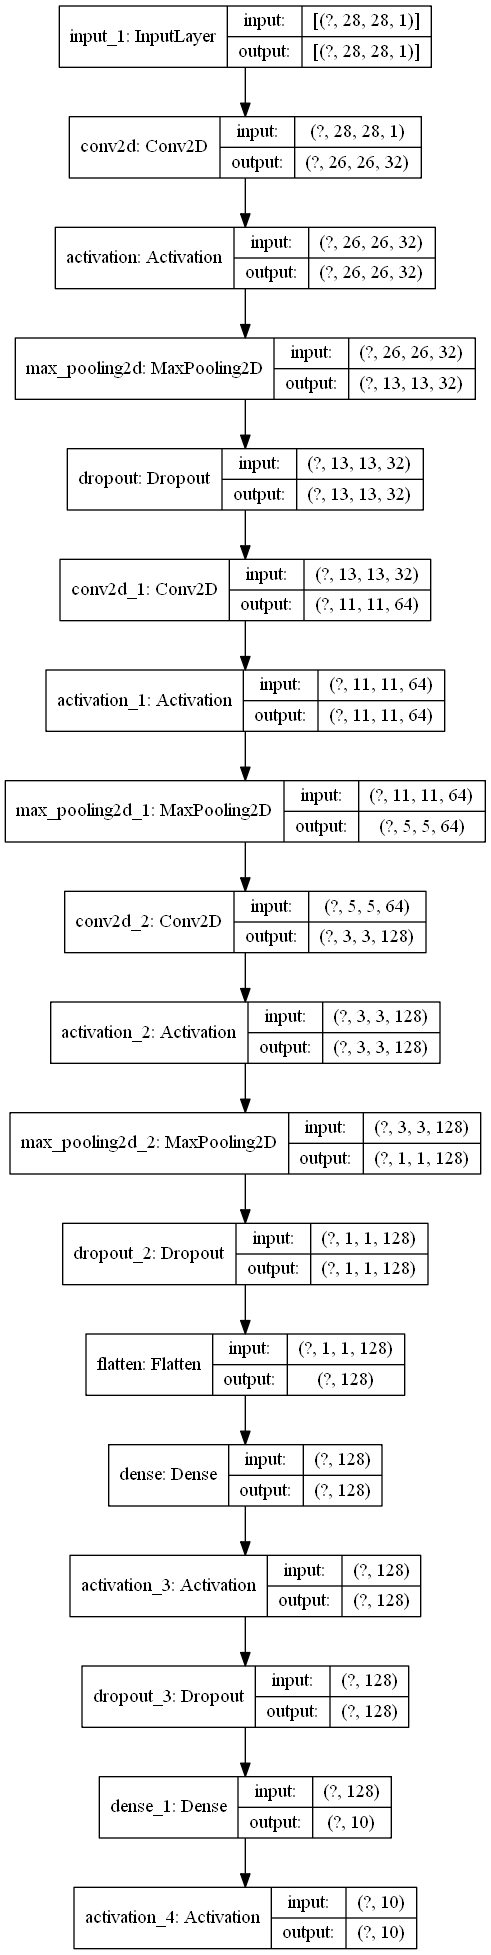

In [16]:
# funktioniert nicht auf jupyter.icc.informatik.haw-hamburg.de
plot_model(model, show_shapes=True, show_layer_names=True)   

In [17]:
model.compile(loss     =  'categorical_crossentropy',
              optimizer=  'adam',
              metrics  =  ['accuracy'])



hist3 = model.fit(X_train, Y_train, 
                  batch_size = 32, 
                  epochs     = 2, #10,   # ohne GPU nicht mehr als 4, sonst wartet man seeehr lange.
                  verbose    = 1,
                  validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 17s 281us/sample - loss: 0.3807 - accuracy: 0.8802 - val_loss: 0.0768 - val_accuracy: 0.9763
Epoch 2/2
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1413 - accuracy: 0.9593 - val_loss: 0.0601 - val_accuracy: 0.9812


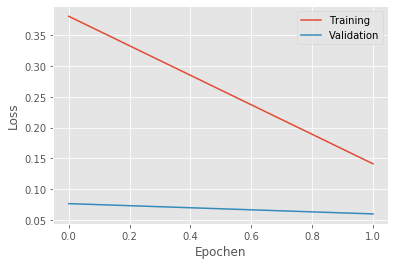

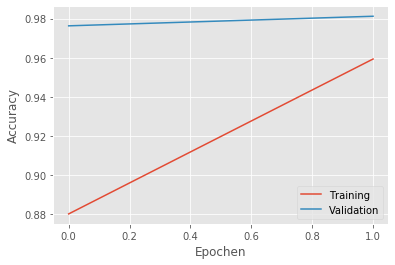

In [18]:
plt.figure(6)
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure(7)
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()

In [19]:
# Die erkannten Klassen der Testdaten bestimmen.
predicted_class_probs  = model.predict(X_test)
predicted_classes      = predicted_class_probs.argmax(axis=-1)

# Die Indices der richtig und falsch erkannten Muster bestimmen
correct   = np.nonzero(predicted_classes == y_test_ori)[0]     # nonzero:  Return the indices of array-
incorrect = np.nonzero(predicted_classes != y_test_ori)[0]     #           elements that are non-zero ()

In [20]:
np.nonzero(predicted_classes != y_test_ori)[0].size

188

<Figure size 432x288 with 0 Axes>

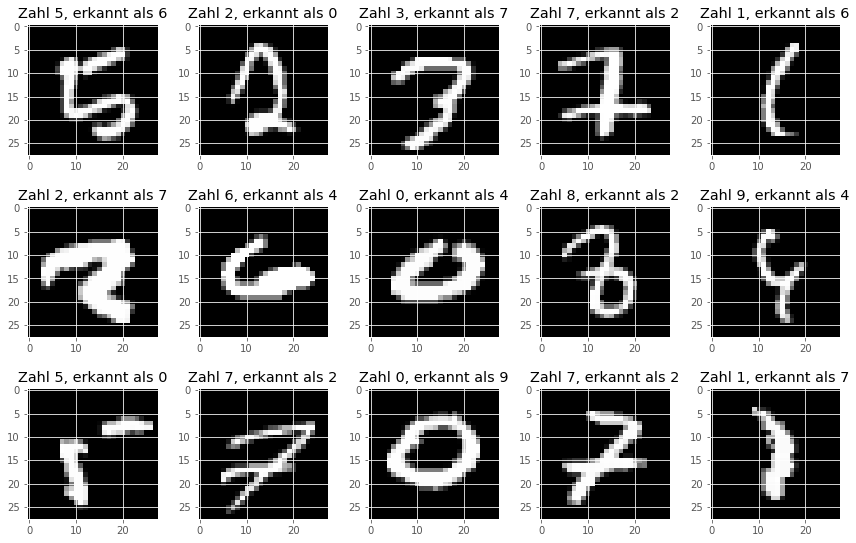

In [21]:
start                = 40    # Startindex

plt.figure(8)
plt.figure(figsize   = (12,8))
           
for i, incorr in enumerate(incorrect[start:start+15]):
    #print(i, incorr)
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[incorr].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Zahl {}, erkannt als {}".format(y_test_ori[incorr], predicted_classes[incorr]))
    plt.tight_layout()